# Init

In [1]:
%load_ext autoreload
%autoreload 2

{'table':             MG_white EG_white MG_black EG_black MG_total EG_total
Eval term                                                        
Material        ----     ----     ----     ----     0.25     0.53
Imbalance       ----     ----     ----     ----     0.26     0.18
Pawns           0.09    -0.17     0.25    -0.01    -0.16    -0.16
Knights        -0.19    -0.22     0.00     0.00    -0.19    -0.22
Bishops         0.00     0.00     0.06    -0.06    -0.06     0.06
Rooks           0.00     0.00     0.00     0.00     0.00     0.00
Queens          0.00     0.00     0.00     0.00     0.00     0.00
Mobility        0.01     0.03     0.30     0.31    -0.28    -0.28
King_safety    -0.40    -0.06    -0.04    -0.11    -0.36     0.05
Threats         0.43     0.27     0.40     0.24     0.03     0.03
Passed         -0.00     0.19     0.31     0.54    -0.32    -0.35
Space           0.00     0.00     0.00     0.00     0.00     0.00
Winnable        ----     ----     ----     ----     0.00    -0.08


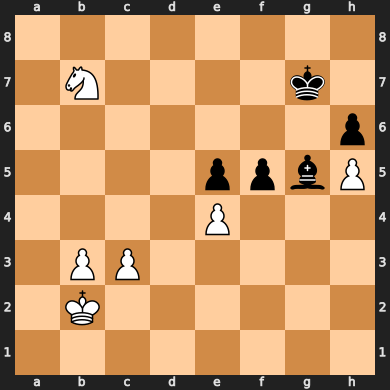

In [11]:
import chess
from utils import get_nnue_eval_from_fen, remove_kings_from_piece_map
import numpy as np

fen_string = '8/1N4k1/7p/4ppbP/4P3/1PP5/1K6/8'

print(get_nnue_eval_from_fen(fen_string))
board  = chess.Board(fen_string)
board

# Sandbox

In [3]:
org_piece_map = board.piece_map()
org_piece_map

{54: Piece.from_symbol('k'),
 49: Piece.from_symbol('N'),
 47: Piece.from_symbol('p'),
 39: Piece.from_symbol('P'),
 38: Piece.from_symbol('b'),
 37: Piece.from_symbol('p'),
 36: Piece.from_symbol('p'),
 28: Piece.from_symbol('P'),
 18: Piece.from_symbol('P'),
 17: Piece.from_symbol('P'),
 9: Piece.from_symbol('K')}

In [4]:
board.remove_piece_at(49)
board.piece_map()

{54: Piece.from_symbol('k'),
 47: Piece.from_symbol('p'),
 39: Piece.from_symbol('P'),
 38: Piece.from_symbol('b'),
 37: Piece.from_symbol('p'),
 36: Piece.from_symbol('p'),
 28: Piece.from_symbol('P'),
 18: Piece.from_symbol('P'),
 17: Piece.from_symbol('P'),
 9: Piece.from_symbol('K')}

In [5]:
board.set_piece_map(org_piece_map)
board.piece_map()

{54: Piece.from_symbol('k'),
 49: Piece.from_symbol('N'),
 47: Piece.from_symbol('p'),
 39: Piece.from_symbol('P'),
 38: Piece.from_symbol('b'),
 37: Piece.from_symbol('p'),
 36: Piece.from_symbol('p'),
 28: Piece.from_symbol('P'),
 18: Piece.from_symbol('P'),
 17: Piece.from_symbol('P'),
 9: Piece.from_symbol('K')}

# Heatmaps

In [13]:
from captum.attr import (
    ShapleyValueSampling,
)
from utils import eval_class


    

eval = eval_class(board, 
                pertub_pieces = 
                    [
                        'p',
                        'b',
                        'n',
                        'r',
                        'q'
                    ]
                )
alg_svs = ShapleyValueSampling(eval)

mat =  alg_svs.attribute(eval.input,
                        baselines = 0,
                        target=0,
                        perturbations_per_eval = 1,
                        n_samples=50,
                        show_progress=True).detach().cpu().numpy()

tensor([[1.2200]], dtype=torch.float64)

In [16]:
'asdfasdf'.split()

['asdfasdf']

[]

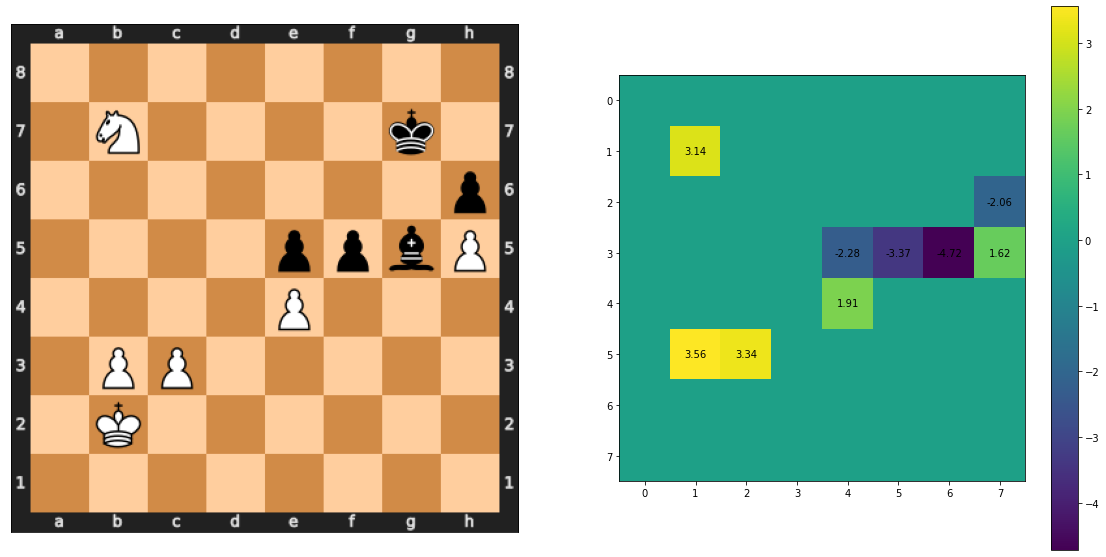

In [22]:
import matplotlib.pyplot as plt
import cairosvg
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO



zeros_mat = np.zeros((8,8))
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,10))

for i in range(mat.shape[1]):
    zeros_mat.ravel()[63-eval.chosen_map_keys[i]] = mat[0,i]
zeros_mat = np.fliplr(zeros_mat)
ax2_plot = ax2.imshow(zeros_mat)
plt.colorbar(ax2_plot, ax=ax2)


for i in range(zeros_mat.shape[0]):
   for j in range(zeros_mat.shape[1]):
      c = zeros_mat[j, i]
      if c != 0:
        ax2.text(i, j, f'{c:.2f}', va='center', ha='center', c ='black')


svg = chess.svg.board(board)
img = cairosvg.svg2png(svg)
img = Image.open(BytesIO(img))
ax1_plot = ax1.imshow(img)
ax1.set_xticks([])
ax1.set_yticks([])



